In [43]:
from pprint import pprint
import tempfile

%matplotlib inline
import matplotlib.pyplot as plt
plt.switch_backend('cairo')
import pandas as pd
import seaborn as sns
import yaml

import graph_tool as gt
import graph_tool.all

plt.style.use('fivethirtyeight')

In [44]:
with open('../outputs/stats/31/invertebrate/GCF_000002195.4_Amel_4.5_cds_from_genomic.stats', 'r') as f:
    data = yaml.load(f)

    for msize in data['motifs']:
        for i, motif in enumerate(data['motifs'][msize][0]):
            with tempfile.TemporaryFile() as f:
                f.write(motif.encode('utf-8'))
                f.seek(0)
                mg = gt.load_graph(f, fmt='dot')
                data['motifs'][msize][0][i] = mg

<Container object of 100 artists>

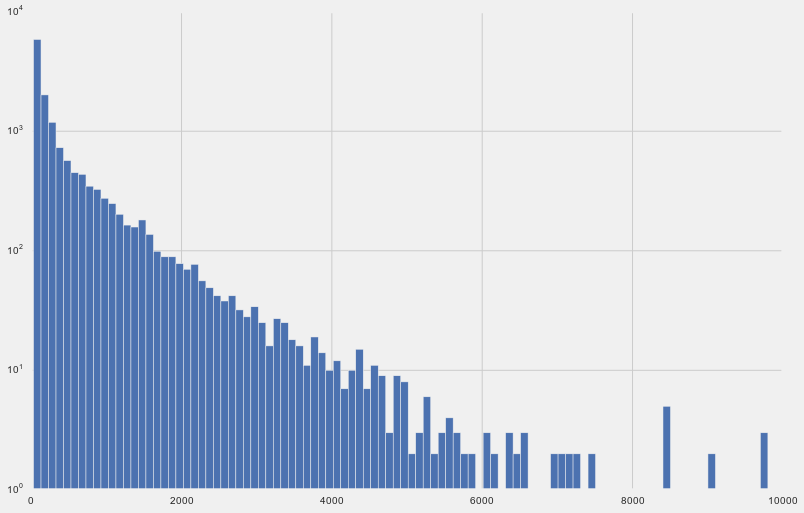

In [45]:
fig = plt.figure(figsize=(12,8))
width = data['linear_paths']['bins'][1] - data['linear_paths']['bins'][0]
plt.bar(data['linear_paths']['bins'][:-1], data['linear_paths']['counts'],
        log=True, width=width)

In [93]:
sum(data['linear_paths']['counts'])

14452

18952
65094
185
3719
18


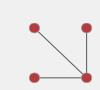

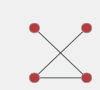

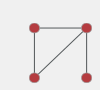

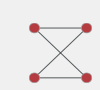

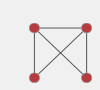

In [90]:
pos = None
for i, mg in enumerate(data['motifs'][4][0]):
    if pos is None:
        pos = mg.new_vertex_property("vector<double>")
        pos[0] = (1,0)
        pos[1] = (1,1)
        pos[2] = (0,1)
        pos[3] = (0,0)
    plt.figure(figsize=(1,1))
    ax = plt.gca()
    plt.axis('off')
    gt.draw.graph_draw(mg, pos=pos, vertex_size=10, mplfig=ax)
    print(data['motifs'][4][1][i])

64011
47


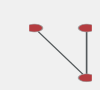

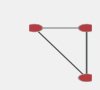

In [92]:
pos = None
for i, mg in enumerate(data['motifs'][3][0]):
    if pos is None:
        pos = mg.new_vertex_property("vector<double>")
        pos[0] = (1,0)
        pos[1] = (1,1)
        pos[2] = (.5,1)
    plt.figure(figsize=(1,1))
    ax = plt.gca()
    plt.axis('off')
    gt.draw.graph_draw(mg, pos=pos, vertex_size=10, mplfig=ax)
    print(data['motifs'][3][1][i])

In [87]:
data['motifs'][3][1]

[64011, 47]